In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import json 

sys.path.append("..")

In [2]:
from src.mcmc import decode_MCMC_heat, decode_MCMC, cross_validation, eval_solution_lw
from src.cipher_utils import create_encryption_dict, encode
from src.corpus_utils import get_letter_frequencies

In [3]:
text = "Whiskers was no ordinary cat he believed he was a pirate. Each morning, he climbed the tallest shelf in the house, meowed like a captain, and batted down anything in his path. One day, he discovered a crumpled treasure map under the rug. Tail high, he followed it through the garden, under the fence, and into the neighbors shed. There, among dusty boxes, he found his prize: a forgotten box of tuna. He purred victoriously, the fearless feline captain of Tuna Island.".lower()

In [4]:
with open("../data/en_perc_dict.json") as file:
    perc_dict = json.load(file)

with open("../data/en_corpus.txt") as file:
    corpus = file.read().lower()    

encryption_dict = create_encryption_dict()
encoded_text = encode(text, encryption_dict)

In [5]:
corpus_letters, corpus_frequencies = get_letter_frequencies(corpus)
text_letters, text_frequencies = get_letter_frequencies(encoded_text)

In [6]:
freq_based_encryption_dict = {corpus_letters[i]: text_letters[i] for i in range(len(corpus_letters))}

In [7]:
plan = [np.log(k+1) + 100 for k in range(10000)]

In [8]:
decode_MCMC_heat(encoded_text, perc_dict, plan, repeat=1, encryption_dict=freq_based_encryption_dict)[2][-1] 

'whiszers was no ordinary cat he believed he was a pirate. each morning, he climbed the tallest shelf in the house, meowed lize a captain, and batted down anything in his path. one day, he discovered a crumpled treasure map under the rug. tail high, he followed it through the garden, under the fence, and into the neighbors shed. there, among dusty bokes, he found his prijex a forgotten bok of tuna. he purred victoriously, the fearless feline captain of tuna island.'

In [9]:
n = 10000
plans = [[np.log(k + 1) + 100 for k in range(n)], [(k+1)/10 for k in range(n)], [1.01**k for k in range(n)]]
rep = 1
iters = n*rep
attempts = 50
labels = ["Logarithmic", "Linear", "Exponential"]

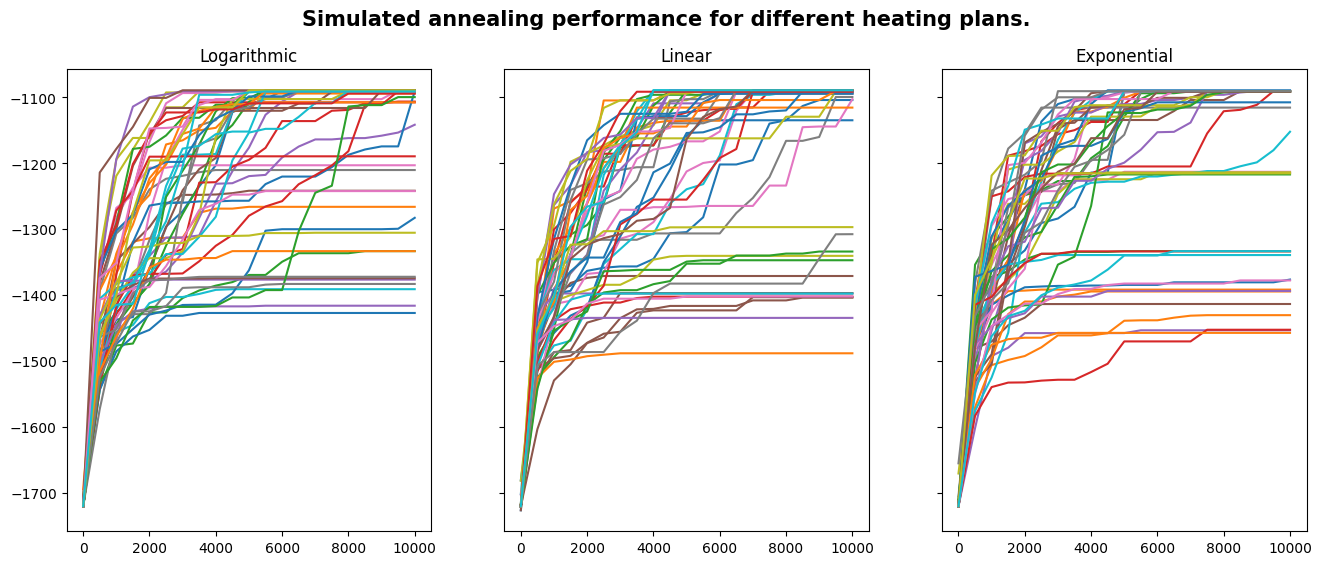

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
fig.suptitle("Simulated annealing performance for different heating plans.", fontsize=15, fontweight="bold")
for i, plan in enumerate(plans):
    _, scores = cross_validation(attempts, encoded_text, perc_dict, 1, "annealing", heating_plan=plan, repeat=rep, encryption_dict=freq_based_encryption_dict)
    for l in range(len(scores)):
        ax[i].plot(list(range(0, iters+1, 500)), scores[l])
    ax[i].set_title(labels[i])

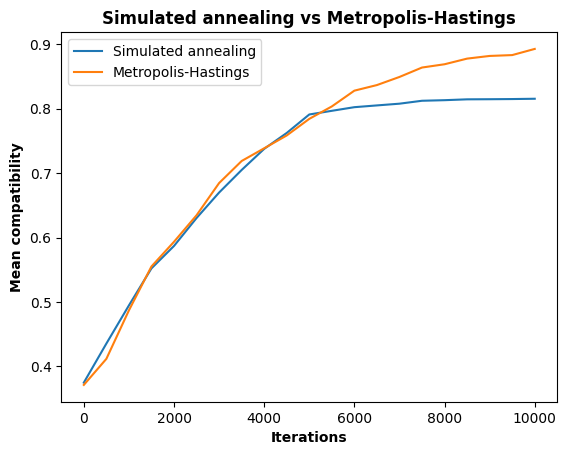

In [ ]:
n = 5000
rep = 2
iters = n*rep
plan = [np.log(k+1) + 100 for k in range(n)]
attempts = 50

annealing = np.zeros(int(iters/500 + 1))
metropolis = np.zeros(int(iters/500 + 1))
for i in range(attempts):
    _, _, texts_def = decode_MCMC(encoded_text, perc_dict, iters, freq_based_encryption_dict)
    _, _, texts_ann = decode_MCMC_heat(encoded_text, perc_dict, plan, rep, freq_based_encryption_dict)

    metropolis = metropolis + np.array(eval_solution_lw(text, texts_def))
    annealing = annealing + np.array(eval_solution_lw(text, texts_ann))

plt.plot(list(range(0, iters+1, 500)), annealing/attempts, label = "Simulated annealing")
plt.plot(list(range(0, iters+1, 500)), metropolis/attempts, label = "Metropolis-Hastings")
plt.ylabel("Mean compatibility", fontweight = 'bold')
plt.xlabel("Iterations", fontweight = 'bold')
plt.title("Simulated annealing vs Metropolis-Hastings", fontweight="bold")
plt.legend()
plt.show()